# Setup 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
iris = datasets.load_iris()

In [2]:
X = iris.data[:, :2]
y = iris.target
y[y==0] = -1
y[y==2] = 1
y[y==1] = 1    #making in binary class + fitting for svm


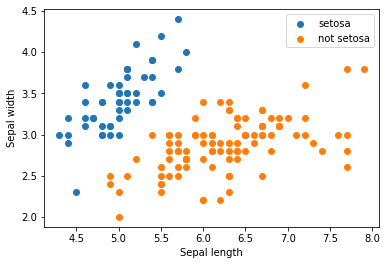

In [3]:
plt.scatter(X[:,0][y==-1], X[:,1][y==-1])
plt.scatter(X[:,0][y==1], X[:,1][y==1])
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")
plt.legend(["setosa","not setosa"])
plt.show()

# Support Vector Machine 

Maximize margin between classes. 

Hinge loss

$$
\ cond = (wX - b)y >=1 \\
$$


                                                        If cond is true
$$
L = 0
$$

                                                        If cond is false

$$
L = 1 - (wX - b)y
$$

Cost function

$$
J = ||w||^{2} + \frac{1}{m}\sum_{i = 1}^{i = m}\max(0,1-(wx_{i}-b)y_{i})\\
$$

                                                        If cond is true
$$
J_{i} = ||w||^{2} 
$$

                                                        If cond is false
                                                        
$$
J_{i} = ||w||^{2} + 1 - (wx_{i} - b)y_{i}
$$


Gradients

                                                        If cond is true
$$
\frac{\partial}{\partial w} = 2w \\
\frac{\partial}{\partial b} = 0 \\
$$

                                                        If cond is false
$$
\frac{\partial}{\partial w} = 2w - x_{i}y_{i} \\
\frac{\partial}{\partial b} = y_{i} \\
$$

Step function

                                                        If cond it true
$$
w = w - \alpha * \frac{\partial}{\partial w}
$$
  
                                                        If cond it false
$$
w = w - \alpha * \frac{\partial}{\partial w}\\
b = b - \alpha * \frac{\partial}{\partial b}
$$

In [91]:
w = np.zeros(len(X[0]))
alpha = 0.01
epochs = 10000
b = 0


for epoch in range(1,epochs):
    for i, x in enumerate(X):
        cond = y[i] * (np.dot(x, w) -b) >= 1
        if cond:
            w = w - alpha * (2*w)
        else:
            w = w - alpha * (2*w - np.dot(x,y[i]))
            b = b - alpha * (y[i])



In [92]:
w, b

(array([0.26125639, 0.16487293]), -0.5800000000000003)

In [93]:
def predict(X):
    return np.sign(np.dot(X,w) - b)

In [94]:
from sklearn import datasets
import matplotlib.pyplot as plt

X, y = datasets.make_blobs(
    n_samples=50, n_features=2, centers=2, cluster_std=1.05, random_state=40
)
y = np.where(y == 0, -1, 1)

In [95]:
predict(X)

array([ 1.,  1., -1.,  1., -1., -1.,  1., -1.,  1., -1.,  1.,  1., -1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1.,  1.,  1., -1., -1.,  1., -1.,  1., -1.,  1.,
        1., -1., -1.,  1.,  1.,  1., -1., -1.,  1.,  1., -1.])

In [96]:
y

array([ 1,  1, -1,  1, -1, -1,  1, -1,  1, -1,  1,  1, -1,  1,  1,  1,  1,
        1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,  1, -1, -1,
        1, -1,  1, -1,  1,  1, -1, -1,  1,  1,  1, -1, -1,  1,  1, -1])

In [97]:
def get_hyperplane_value(x, w, b, offset):
    return (-w[0] * x + b + offset) / w[1]

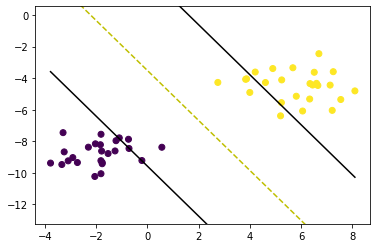

In [98]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.scatter(X[:, 0], X[:, 1], marker="o", c=y)

x0_1 = np.amin(X[:, 0])
x0_2 = np.amax(X[:, 0])

x1_1 = get_hyperplane_value(x0_1, w, b, 0)
x1_2 = get_hyperplane_value(x0_2, w, b, 0)

x1_1_m = get_hyperplane_value(x0_1, w, b, -1)
x1_2_m = get_hyperplane_value(x0_2, w, b, -1)

x1_1_p = get_hyperplane_value(x0_1, w, b, 1)
x1_2_p = get_hyperplane_value(x0_2, w, b, 1)

ax.plot([x0_1, x0_2], [x1_1, x1_2], "y--")
ax.plot([x0_1, x0_2], [x1_1_m, x1_2_m], "k")
ax.plot([x0_1, x0_2], [x1_1_p, x1_2_p], "k")

x1_min = np.amin(X[:, 1])
x1_max = np.amax(X[:, 1])
ax.set_ylim([x1_min - 3, x1_max + 3])

plt.show()